<a href="https://colab.research.google.com/github/TirmidziOthman/Vehicle-Routing-Problem---ACO/blob/main/VRP_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
#/content/drive/MyDrive/Colab Notebooks/datasets/Data.xlsx

In [ ]:
# Import Data
Table1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Data.xlsx', sheet_name='Distribution Centre', index_col=0, header=0)
Table2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Data.xlsx', sheet_name='Demand', index_col=0, header=0)
Table3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Data.xlsx', sheet_name='Vehicle Parameters', index_col=0, header=0)

In [ ]:
import functools,operator,os,pandas,math,random,numpy,copy,matplotlib.pyplot as plt

In [ ]:
#/content/drive/MyDrive/Colab Notebooks/datasets/data node vrp.xlsx
data = pandas.ExcelFile('/content/drive/MyDrive/Colab Notebooks/datasets/data node vrp.xlsx')
sheet1 = pandas.read_excel(data,'Sheet1')
sheet2 = pandas.read_excel(data,'Sheet2')

In [ ]:
nodes = sheet1.values
nodes


array([[112, 294, 145],
       [147, 282, 149],
       [133, 259, 289],
       [118, 207, 220],
       [151, 233,  50],
       [123, 284, 211],
       [194, 206, 125],
       [189, 264, 133],
       [198, 209, 278],
       [143, 267, 210],
       [174, 238, 190],
       [192, 268, 254],
       [131, 214, 146],
       [105, 292, 297],
       [177, 299, 238],
       [163, 288, 280],
       [105, 280, 186],
       [154, 263, 146],
       [159, 216, 259],
       [102, 286,  64],
       [102, 231, 215],
       [106, 296, 155],
       [163, 216, 196],
       [101, 208,  57],
       [162, 281, 159],
       [162, 230, 234],
       [139, 227, 200],
       [197, 263, 142],
       [158, 213,   0]])

In [ ]:
nodes = sheet1.values
nodes
depot = nodes[len(nodes)-1]
depot
cities = nodes[:len(nodes)-1]
cities
vehicle = sheet2.values
vehicle
tour = [0,1,2,3,4,5,6,7,8,9,10]
sliceTemp=[]


In [ ]:
def distance(x1,y1,x2,y2):
  return math.sqrt((x1-x2)**2+(y1-y2)**2)

def totaldistancetour(tour):
  d=0

  for i in range(1,len(tour)):
    x1=cities[tour[i-1]][0]
    y1=cities[tour[i-1]][1]
    x2=cities[tour[i]][0]
    y2=cities[tour[i]][1]
    d=d+distance(x1,y1,x2,y2)
  x1=cities[tour[len(tour)-1]][0]
  y1=cities[tour[len(tour)-1]][1]
  x2=depot[0]
  y2=depot[1]
  d=d+distance(x1,y1,x2,y2)
  x1=cities[tour[0]][0]
  y1=cities[tour[0]][1]
  x2=depot[0]
  y2=depot[1]
  d=d+distance(x1,y1,x2,y2)
  return d

In [ ]:
cities[4][2]
cities[0][2]

145

In [ ]:

def subtourslice(tour,vehicle):
  print("start.......")
  capacityused = numpy.zeros(len(vehicle))
  k=0
  slice = []
  mass=[]
  for i in range(len(vehicle)):
    print('weight initial', capacityused[i])
    while capacityused[i] < vehicle[i][1] and k <= (len(tour)-1):
      print("enter city ",k)
      print("temporary weight", capacityused[i])
      print("weight carry from city",cities[tour[k]][2])
      print("input to the city",k)
      capacityused[i]=capacityused[i]+cities[tour[k]][2]
      if capacityused[i] > vehicle[i][1]:
        capacityused[i]=capacityused[i]-cities[tour[k]][2]
        k=k-1
        print(k)
        slice.append(k)
        k=k+1
        break
      k=k+1
      mass.append(capacityused[i])
  slice.append(k-1)
  sliceTemp.append(slice)
  return slice,mass









In [ ]:
slice.clear()


In [ ]:
subtourslice(tour,vehicle)

start.......
weight initial 0.0
enter city  0
temporary weight 0.0
weight carry from city 145
input to the city 0
enter city  1
temporary weight 145.0
weight carry from city 149
input to the city 1
enter city  2
temporary weight 294.0
weight carry from city 289
input to the city 2
enter city  3
temporary weight 583.0
weight carry from city 220
input to the city 3
enter city  4
temporary weight 803.0
weight carry from city 50
input to the city 4
enter city  5
temporary weight 853.0
weight carry from city 211
input to the city 5
4
weight initial 0.0
enter city  5
temporary weight 0.0
weight carry from city 211
input to the city 5
enter city  6
temporary weight 211.0
weight carry from city 125
input to the city 6
enter city  7
temporary weight 336.0
weight carry from city 133
input to the city 7
enter city  8
temporary weight 469.0
weight carry from city 278
input to the city 8
enter city  9
temporary weight 747.0
weight carry from city 210
input to the city 9
enter city  10
temporary wei

([4, 9, 10],
 [145.0, 294.0, 583.0, 803.0, 853.0, 211.0, 336.0, 469.0, 747.0, 957.0, 190.0])

In [ ]:
slice

[]

In [ ]:
sliceTemp

[[4, 9, 10]]

In [ ]:
slice.clear()

In [ ]:
def subtour(slice, tour):
    sub = []
    sub.append(tour[:(slice[0] + 1)])
    for i in range(len(slice) - 1):
        sub.append(tour[(slice[i] + 1):(slice[i + 1] + 1)])
        #print(tour[(slicee[i] + 1):(slicee[i + 1] + 1)])
    return sub

In [ ]:

subtour(sliceTemp[0],tour)

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10]]

In [ ]:
st = subtour(sliceTemp[0],tour)
st

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10]]

In [ ]:
totaldistancetour(st[0])

274.39799971700586

In [ ]:
totaldistancetour(st[1])

434.55564825135923

In [ ]:
totaldistancetour(st[2])

111.26595637679621

In [ ]:
def allvehicledistance(sub):
  alldistance = functools.reduce(operator.add,(totaldistancetour(x) for x in sub),0)
  return alldistance

In [ ]:
allvehicledistance(st)

768.3169362869884

In [ ]:
def tourtodistance(tour,vehicle):
  u = subtourslice(tour,vehicle)
  v = subtour(u[0],tour)
  print(v)
  #slicee.clear()
  total = allvehicledistance(v)
  return total

In [ ]:
slice.clear()

In [ ]:
tourtodistance(tour,vehicle)


start.......
weight initial 0.0
enter city  0
temporary weight 0.0
weight carry from city 145
input to the city 0
enter city  1
temporary weight 145.0
weight carry from city 149
input to the city 1
enter city  2
temporary weight 294.0
weight carry from city 289
input to the city 2
enter city  3
temporary weight 583.0
weight carry from city 220
input to the city 3
enter city  4
temporary weight 803.0
weight carry from city 50
input to the city 4
enter city  5
temporary weight 853.0
weight carry from city 211
input to the city 5
4
weight initial 0.0
enter city  5
temporary weight 0.0
weight carry from city 211
input to the city 5
enter city  6
temporary weight 211.0
weight carry from city 125
input to the city 6
enter city  7
temporary weight 336.0
weight carry from city 133
input to the city 7
enter city  8
temporary weight 469.0
weight carry from city 278
input to the city 8
enter city  9
temporary weight 747.0
weight carry from city 210
input to the city 9
enter city  10
temporary wei

768.3169362869884

In [ ]:
slice.clear()

In [ ]:
slice

[]

In [ ]:
num=1000
listnewdis=[]
for temperature in numpy.logspace(0,5,num)[::-1]:
  oldDistance =tourtodistance(tour,vehicle)
  [i,j] = sorted(random.sample(range(num) , 2))
  newTour = tour[:i] + tour[i+1:j]+tour[i:i+1]+tour[j+1:]
  newDistance = tourtodistance(newTour,vehicle)
  listnewdis.append(newDistance)
  if math.exp (( oldDistance - newDistance ) / temperature) > random.random():
    tour =copy.copy(newTour)
    bestDistance = copy.copy(newDistance)





Streaming output truncated to the last 5000 lines.
enter city  0
temporary weight 0.0
weight carry from city 50
input to the city 0
enter city  1
temporary weight 50.0
weight carry from city 211
input to the city 1
enter city  2
temporary weight 261.0
weight carry from city 133
input to the city 2
enter city  3
temporary weight 394.0
weight carry from city 278
input to the city 3
enter city  4
temporary weight 672.0
weight carry from city 125
input to the city 4
enter city  5
temporary weight 797.0
weight carry from city 289
input to the city 5
4
weight initial 0.0
enter city  5
temporary weight 0.0
weight carry from city 289
input to the city 5
enter city  6
temporary weight 289.0
weight carry from city 145
input to the city 6
enter city  7
temporary weight 434.0
weight carry from city 220
input to the city 7
enter city  8
temporary weight 654.0
weight carry from city 210
input to the city 8
enter city  9
temporary weight 864.0
weight carry from city 149
input to the city 9
8
weight i

In [ ]:
bestslice = subtourslice(tour,vehicle)

start.......
weight initial 0.0
enter city  0
temporary weight 0.0
weight carry from city 50
input to the city 0
enter city  1
temporary weight 50.0
weight carry from city 211
input to the city 1
enter city  2
temporary weight 261.0
weight carry from city 133
input to the city 2
enter city  3
temporary weight 394.0
weight carry from city 278
input to the city 3
enter city  4
temporary weight 672.0
weight carry from city 125
input to the city 4
enter city  5
temporary weight 797.0
weight carry from city 289
input to the city 5
4
weight initial 0.0
enter city  5
temporary weight 0.0
weight carry from city 289
input to the city 5
enter city  6
temporary weight 289.0
weight carry from city 145
input to the city 6
enter city  7
temporary weight 434.0
weight carry from city 220
input to the city 7
enter city  8
temporary weight 654.0
weight carry from city 210
input to the city 8
enter city  9
temporary weight 864.0
weight carry from city 149
input to the city 9
8
weight initial 0.0
enter ci

In [ ]:
bestsubtour=subtour(bestslice[0],tour)

In [ ]:
bestDistance

698.3389646921721

In [ ]:
tour

[4, 5, 7, 8, 6, 2, 0, 3, 9, 1, 10]

In [ ]:
bestslice

([4, 8, 10],
 [50.0, 261.0, 394.0, 672.0, 797.0, 289.0, 434.0, 654.0, 864.0, 149.0, 339.0])

In [ ]:
bestsubtour

[[4, 5, 7, 8, 6], [2, 0, 3, 9], [1, 10]]

PLOT


In [ ]:
len(nodes)

29

In [ ]:
len(cities)

28

In [ ]:
combinesubtour = numpy.concatenate([x+[28] for x in bestsubtour])
combinesubtour = numpy.append([28],combinesubtour)

In [ ]:
nodes[combinesubtour]

array([[158, 213,   0],
       [143, 267, 210],
       [112, 294, 145],
       [133, 259, 289],
       [174, 238, 190],
       [158, 213,   0],
       [123, 284, 211],
       [151, 233,  50],
       [189, 264, 133],
       [147, 282, 149],
       [118, 207, 220],
       [158, 213,   0],
       [198, 209, 278],
       [194, 206, 125],
       [158, 213,   0]])

<function matplotlib.pyplot.show(close=None, block=None)>

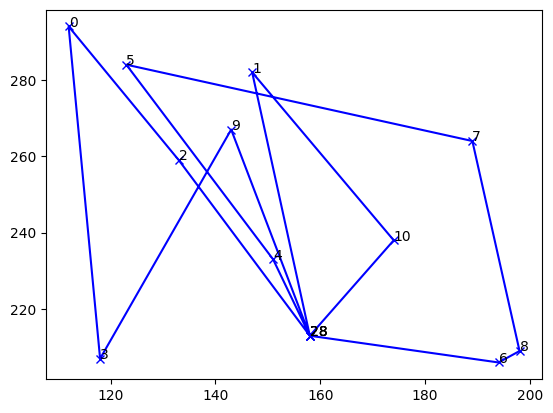

In [ ]:
plt.plot([nodes[combinesubtour[i]][0] for i in range(len(combinesubtour))],
 [nodes[combinesubtour[i]][1] for i in range(len(combinesubtour))],'xb-')
for i in range(len(combinesubtour)):
  plt.annotate(combinesubtour[i], xy=(nodes[combinesubtour[i]][0], nodes[combinesubtour[i]][1]))
plt.show

In [ ]:
bestsubtour

[[4, 5, 7, 8, 6], [2, 0, 3, 9], [1, 10]]

In [ ]:
nodes[combinesubtour][:,0]

array([158, 118, 123, 143, 133, 151, 158, 194, 112, 147, 174, 198, 158,
       189, 158])

In [ ]:
nodes[bestsubtour[1]]

array([[194, 206, 125],
       [112, 294, 145],
       [147, 282, 149],
       [174, 238, 190],
       [198, 209, 278]])

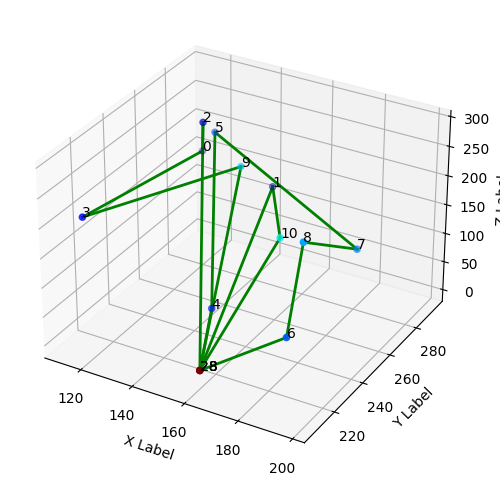

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(nodes[combinesubtour][:,0], nodes[combinesubtour][:,1], nodes[combinesubtour][:,2], c=combinesubtour, cmap='jet', marker='o')

# Connecting lines
for i in range(len(combinesubtour)-1):
    ax.plot([nodes[combinesubtour[i], 0], nodes[combinesubtour[i+1], 0]],
            [nodes[combinesubtour[i], 1], nodes[combinesubtour[i+1], 1]],
            [nodes[combinesubtour[i], 2], nodes[combinesubtour[i+1], 2]],
            'g-', linewidth=2)

ax.plot([nodes[combinesubtour[0], 0], nodes[combinesubtour[-1], 0]],
        [nodes[combinesubtour[0], 1], nodes[combinesubtour[-1], 1]],
        [nodes[combinesubtour[0], 2], nodes[combinesubtour[-1], 2]],
        'g-', linewidth=2)

# Labels
for i in range(len(combinesubtour)):
    ax.text(nodes[combinesubtour[i], 0], nodes[combinesubtour[i], 1], nodes[combinesubtour[i], 2],
            str(combinesubtour[i]), color='black')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
